### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

La suma de las ventas de la tienda 1 fue: $1150880400.0 pesos colombianos
La suma de las ventas de la tienda 2 fue: $1116343500.0 pesos colombianos
La suma de las ventas de la tienda 3 fue: $1098019600.0 pesos colombianos
La suma de las ventas de la tienda 4 fue: $1038375700.0 pesos colombianos
>>> SUMA TOTAL DE TODAS LAS TIENDAS: $4403619200.0 pesos colombianos <<<


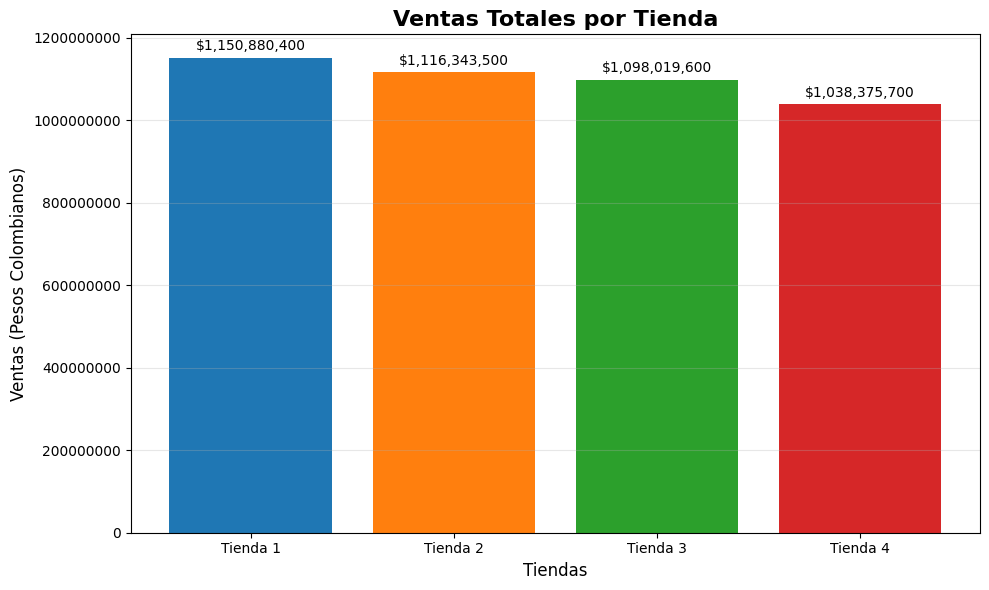

In [19]:
import matplotlib.pyplot as plt

def mostrar_ventas_tienda(dataframe, numero_tienda):
    # Calcula y muestra la suma total de ventas de una tienda específica.
    suma = dataframe['Precio'].sum()
    print(f"La suma de las ventas de la tienda {numero_tienda} fue: ${suma} pesos colombianos")
    return suma

def crear_grafico_ventas(nombres_tiendas, ventas_valores):
    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    barras = plt.bar(nombres_tiendas, ventas_valores,
                     color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

    plt.title('Ventas Totales por Tienda', fontsize=16, fontweight='bold')
    plt.xlabel('Tiendas', fontsize=12)
    plt.ylabel('Ventas (Pesos Colombianos)', fontsize=12)

    # Formatear el eje Y para mostrar números completos
    plt.ticklabel_format(style='plain', axis='y')

    # Agregar grid para mejor legibilidad
    plt.grid(axis='y', alpha=0.3)

    # Agregar valores encima de cada barra
    for i, valor in enumerate(ventas_valores):
        plt.text(i, valor + max(ventas_valores)*0.01,
                 f'${valor:,.0f}',
                 ha='center', va='bottom')

    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

def analizar_ventas_todas_tiendas(tiendas_dataframes):
    # Analiza las ventas de todas las tiendas y genera el reporte completo.

    # Calcular ventas por tienda
    resultados_ventas = []
    for dataframe, numero_tienda in tiendas_dataframes:
        resultado = mostrar_ventas_tienda(dataframe, numero_tienda)
        resultados_ventas.append(resultado)

    # Calcular suma total
    suma_total = sum(resultados_ventas)
    print(f">>> SUMA TOTAL DE TODAS LAS TIENDAS: ${suma_total} pesos colombianos <<<")

    return resultados_ventas, suma_total

# Configurar los datos de las tiendas
tiendas_dataframes = [
    (tienda, 1),
    (tienda2, 2),
    (tienda3, 3),
    (tienda4, 4)
]

# Analizar ventas de todas las tiendas
resultados_ventas, suma_total = analizar_ventas_todas_tiendas(tiendas_dataframes)

# Preparar datos para el gráfico
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
crear_grafico_ventas(nombres_tiendas, resultados_ventas)



# 2. Ventas por categoría

Calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.


ANÁLISIS DE VENTAS POR CATEGORÍA

 Tienda 1
----------------------------------------
Total productos: 2359
Categorías únicas: 8

TOP 5 CATEGORÍAS:
1. Muebles: 465 ventas (19.7%)
2. Electrónicos: 448 ventas (19.0%)
3. Juguetes: 324 ventas (13.7%)
4. Electrodomésticos: 312 ventas (13.2%)
5. Deportes y diversión: 284 ventas (12.0%)

 Tienda 2
----------------------------------------
Total productos: 2359
Categorías únicas: 8

TOP 5 CATEGORÍAS:
1. Muebles: 442 ventas (18.7%)
2. Electrónicos: 422 ventas (17.9%)
3. Juguetes: 313 ventas (13.3%)
4. Electrodomésticos: 305 ventas (12.9%)
5. Deportes y diversión: 275 ventas (11.7%)

 Tienda 3
----------------------------------------
Total productos: 2359
Categorías únicas: 8

TOP 5 CATEGORÍAS:
1. Muebles: 499 ventas (21.2%)
2. Electrónicos: 451 ventas (19.1%)
3. Juguetes: 315 ventas (13.4%)
4. Electrodomésticos: 278 ventas (11.8%)
5. Deportes y diversión: 277 ventas (11.7%)

 Tienda 4
----------------------------------------
Total productos: 235

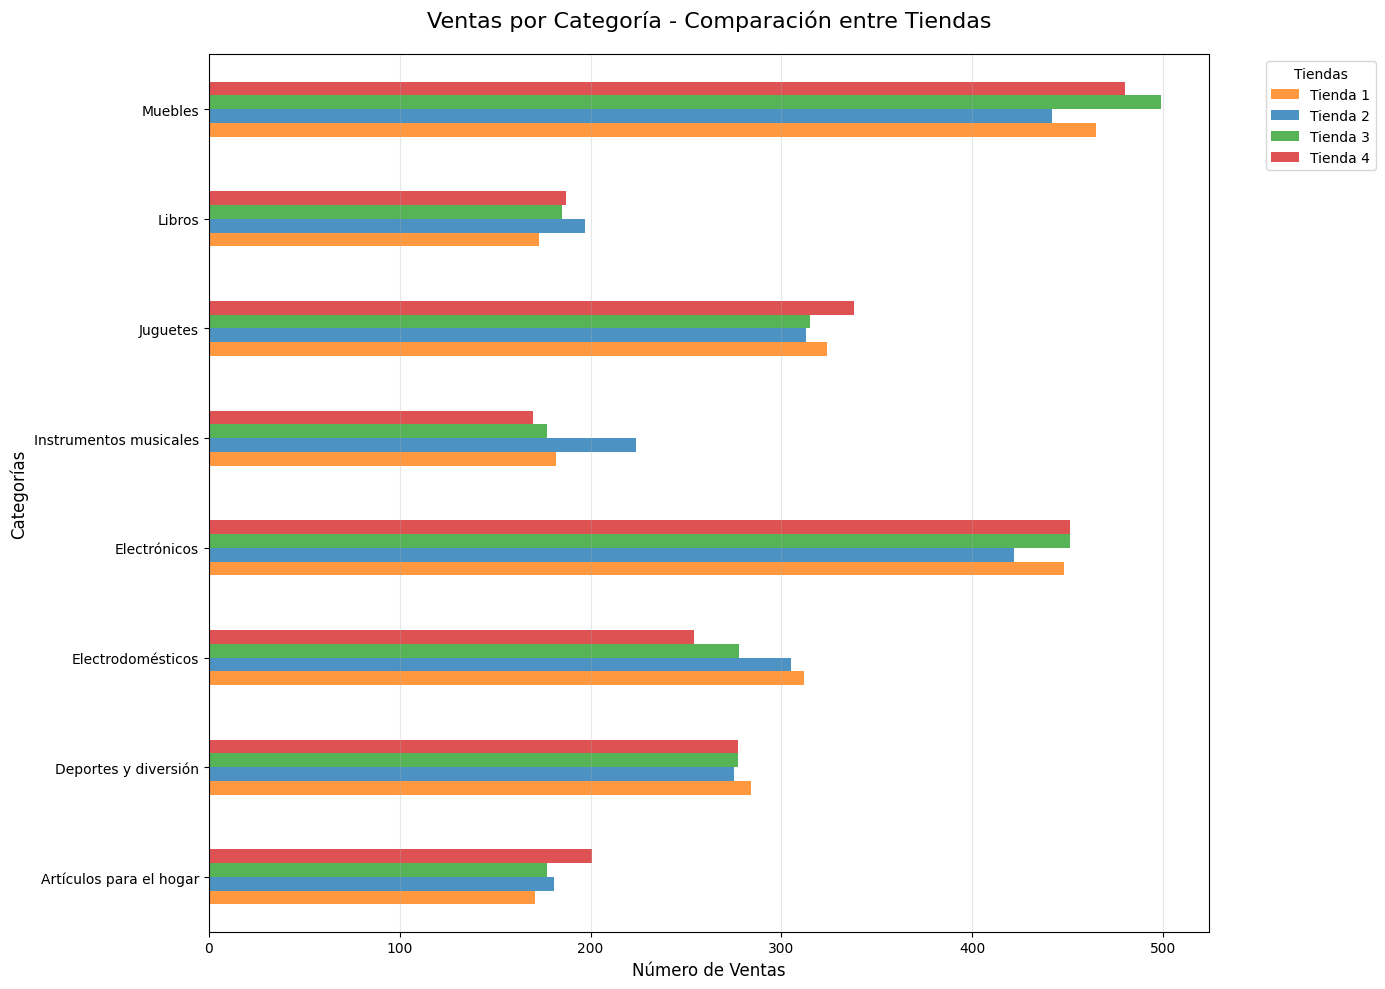


ANÁLISIS CONSOLIDADO TODAS LAS TIENDAS

 CATEGORÍAS MÁS VENDIDAS EN GENERAL:
1. Muebles: 1886 ventas (20.0%)
2. Electrónicos: 1772 ventas (18.8%)
3. Juguetes: 1290 ventas (13.7%)
4. Electrodomésticos: 1149 ventas (12.2%)
5. Deportes y diversión: 1113 ventas (11.8%)


In [22]:
import matplotlib.pyplot as plt

def analizar_ventas_por_categoria(tiendas_dict):
    """
    Analiza ventas por categoría para cada tienda y muestra:
    - Reporte individual por tienda
    - Gráfico comparativo por categorías
    - Reporte consolidado
    """

    resultados = {}

    print("\n" + "="*50)
    print("ANÁLISIS DE VENTAS POR CATEGORÍA")
    print("="*50)

    # 1. Procesar cada tienda individualmente
    for nombre_tienda, df in tiendas_dict.items():
        ventas_por_cat = df['Categoría del Producto'].value_counts()
        resultados[nombre_tienda] = ventas_por_cat

        # Mostrar reporte individual
        print(f"\n {nombre_tienda}")
        print("-"*40)
        print(f"Total productos: {len(df)}")
        print(f"Categorías únicas: {len(ventas_por_cat)}")
        print(f"\nTOP 5 CATEGORÍAS:")
        for i, (cat, cant) in enumerate(ventas_por_cat.head(5).items(), 1):
            print(f"{i}. {cat}: {cant} ventas ({(cant/len(df))*100:.1f}%)")

    # 2. GRÁFICO COMPARATIVO ENTRE TIENDAS
    print("\n" + "="*50)
    print("GRÁFICO COMPARATIVO POR CATEGORÍAS")
    print("="*50)

    # Obtener todas las categorías únicas
    todas_categorias = set()
    for ventas in resultados.values():
        todas_categorias.update(ventas.index)
    todas_categorias = sorted(list(todas_categorias))

    # Crear matriz de datos para el gráfico
    datos_grafico = {}
    for tienda, ventas in resultados.items():
        datos_grafico[tienda] = [ventas.get(cat, 0) for cat in todas_categorias]

    # Crear el gráfico de barras horizontales agrupadas
    df_grafico = pd.DataFrame(datos_grafico, index=todas_categorias)

    ax = df_grafico.plot(kind='barh',
                        figsize=(14, 10),
                        color=['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728'],
                        alpha=0.8)

    plt.title('Ventas por Categoría - Comparación entre Tiendas', fontsize=16, pad=20)
    plt.xlabel('Número de Ventas', fontsize=12)
    plt.ylabel('Categorías', fontsize=12)
    plt.legend(title='Tiendas', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 3. Análisis consolidado
    print("\n" + "="*50)
    print("ANÁLISIS CONSOLIDADO TODAS LAS TIENDAS")
    print("="*50)

    todos_datos = pd.concat(tiendas_dict.values(), ignore_index=True)
    ventas_totales = todos_datos['Categoría del Producto'].value_counts()

    print("\n CATEGORÍAS MÁS VENDIDAS EN GENERAL:")
    for i, (cat, cant) in enumerate(ventas_totales.head(5).items(), 1):
        print(f"{i}. {cat}: {cant} ventas ({(cant/len(todos_datos))*100:.1f}%)")

    return resultados

tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

resultados = analizar_ventas_por_categoria(tiendas)

# 3. Calificación promedio de la tienda


Calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.


Satisfacción del cliente - Tienda 1
----------------------------------------
Calificación promedio: 3.98/5
Total de calificaciones registradas: 2359

Satisfacción del cliente - Tienda 2
----------------------------------------
Calificación promedio: 4.04/5
Total de calificaciones registradas: 2359

Satisfacción del cliente - Tienda 3
----------------------------------------
Calificación promedio: 4.05/5
Total de calificaciones registradas: 2359

Satisfacción del cliente - Tienda 4
----------------------------------------
Calificación promedio: 4.0/5
Total de calificaciones registradas: 2358


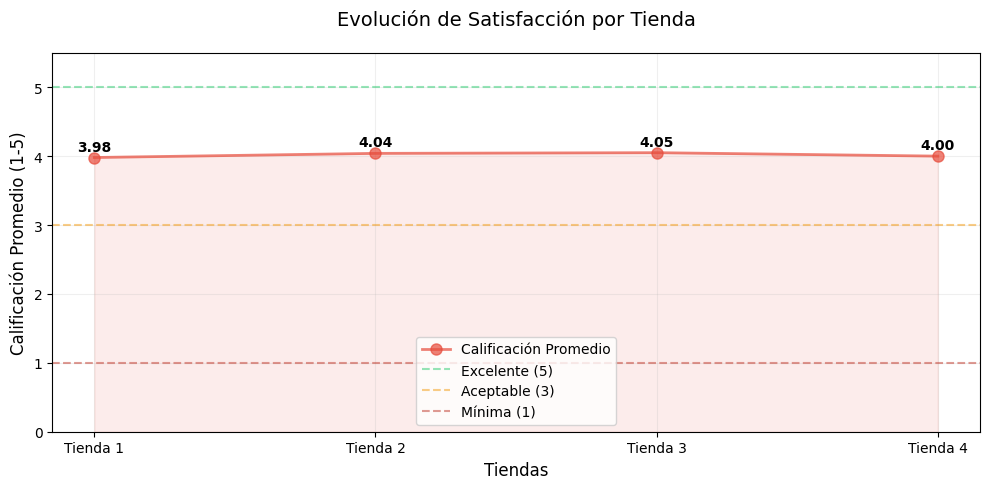

In [18]:
import matplotlib.pyplot as plt

def calcular_promedio_calificaciones(dataframe, nombre_tienda):
    # Calcular el promedio de calificaciones
    promedio = round(dataframe['Calificación'].mean(), 2)

    # Mostrar resultados
    print(f"\nSatisfacción del cliente - Tienda {nombre_tienda}")
    print("----------------------------------------")
    print(f"Calificación promedio: {promedio}/5")
    print(f"Total de calificaciones registradas: {len(dataframe)}")

    # Retornar el promedio por si se necesita para otros cálculos
    return promedio

def grafico_calificaciones_lineas(tiendas, promedios):
    """
    Gráfico de líneas con puntos destacados para las calificaciones.
    """
    plt.figure(figsize=(10, 5))

    # Crear línea principal
    plt.plot(tiendas, promedios, marker='o', markersize=8,
             color='#e74c3c', linewidth=2, alpha=0.7,
             label='Calificación Promedio')

    # Líneas de referencia
    plt.axhline(y=5, color='#2ecc71', linestyle='--', alpha=0.5, label='Excelente (5)')
    plt.axhline(y=3, color='#f39c12', linestyle='--', alpha=0.5, label='Aceptable (3)')
    plt.axhline(y=1, color='#c0392b', linestyle='--', alpha=0.5, label='Mínima (1)')

    # Rellenar área bajo la curva
    plt.fill_between(tiendas, promedios, alpha=0.1, color='#e74c3c')

    # Añadir etiquetas
    for i, valor in enumerate(promedios):
        plt.text(i, valor + 0.1, f'{valor:.2f}', ha='center',
                fontweight='bold', fontsize=10)

    # Personalización
    plt.title('Evolución de Satisfacción por Tienda', fontsize=14, pad=20)
    plt.xlabel('Tiendas', fontsize=12)
    plt.ylabel('Calificación Promedio (1-5)', fontsize=12)
    plt.ylim(0, 5.5)
    plt.legend()
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

# Aplicar la función a cada tienda
promedio_tienda1 = calcular_promedio_calificaciones(tienda, 1)
promedio_tienda2 = calcular_promedio_calificaciones(tienda2, 2)
promedio_tienda3 = calcular_promedio_calificaciones(tienda3, 3)
promedio_tienda4 = calcular_promedio_calificaciones(tienda4, 4)

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios = [promedio_tienda1, promedio_tienda2, promedio_tienda3, promedio_tienda4]

# Usar la función
grafico_calificaciones_lineas(tiendas, promedios)

# 4. Productos más y menos vendidos

Se debe dentificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.


ANÁLISIS DE PRODUCTOS - Tienda 1
Total ventas: 2359
Productos únicos: 51

 PRODUCTO MÁS VENDIDO:
   Microondas - 60 ventas

 PRODUCTO MENOS VENDIDO:
   Celular ABXY - 33 ventas

 TOP 5 PRODUCTOS:
   1. Microondas - 60 ventas
   2. TV LED UHD 4K - 60 ventas
   3. Armario - 60 ventas
   4. Secadora de ropa - 58 ventas
   5. Mesa de noche - 56 ventas


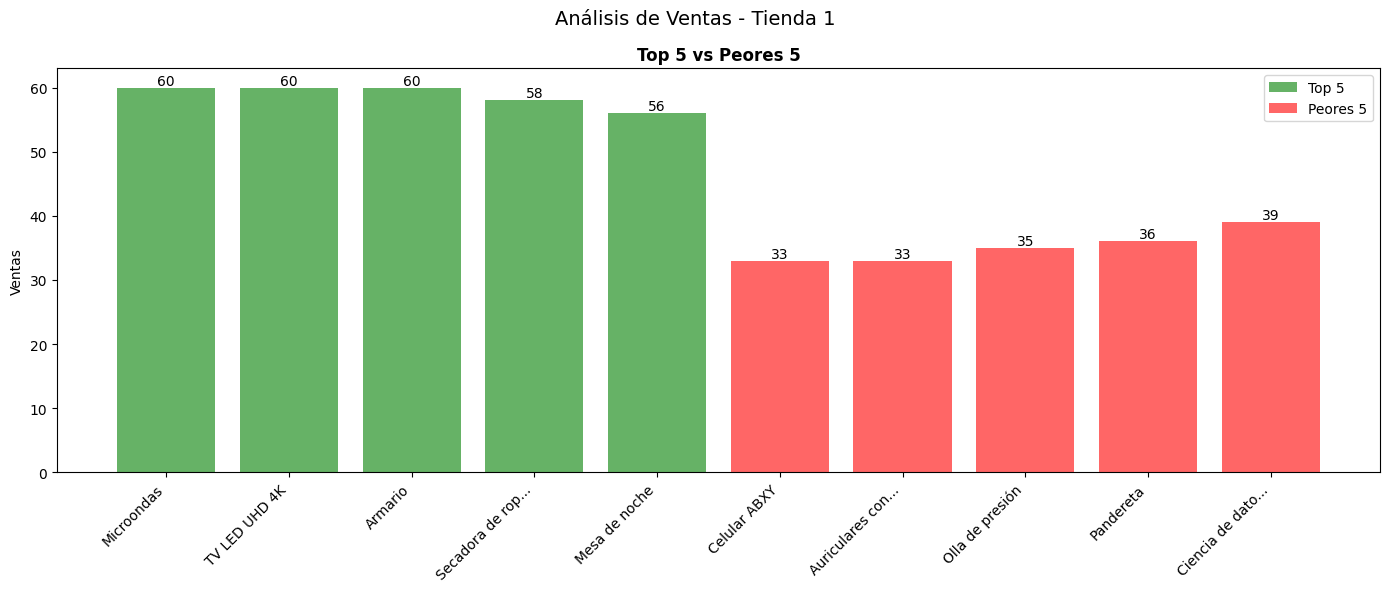


ANÁLISIS DE PRODUCTOS - Tienda 2
Total ventas: 2359
Productos únicos: 51

 PRODUCTO MÁS VENDIDO:
   Iniciando en programación - 65 ventas

 PRODUCTO MENOS VENDIDO:
   Juego de mesa - 32 ventas

 TOP 5 PRODUCTOS:
   1. Iniciando en programación - 65 ventas
   2. Microondas - 62 ventas
   3. Batería - 61 ventas
   4. Guitarra acústica - 58 ventas
   5. Pandereta - 58 ventas


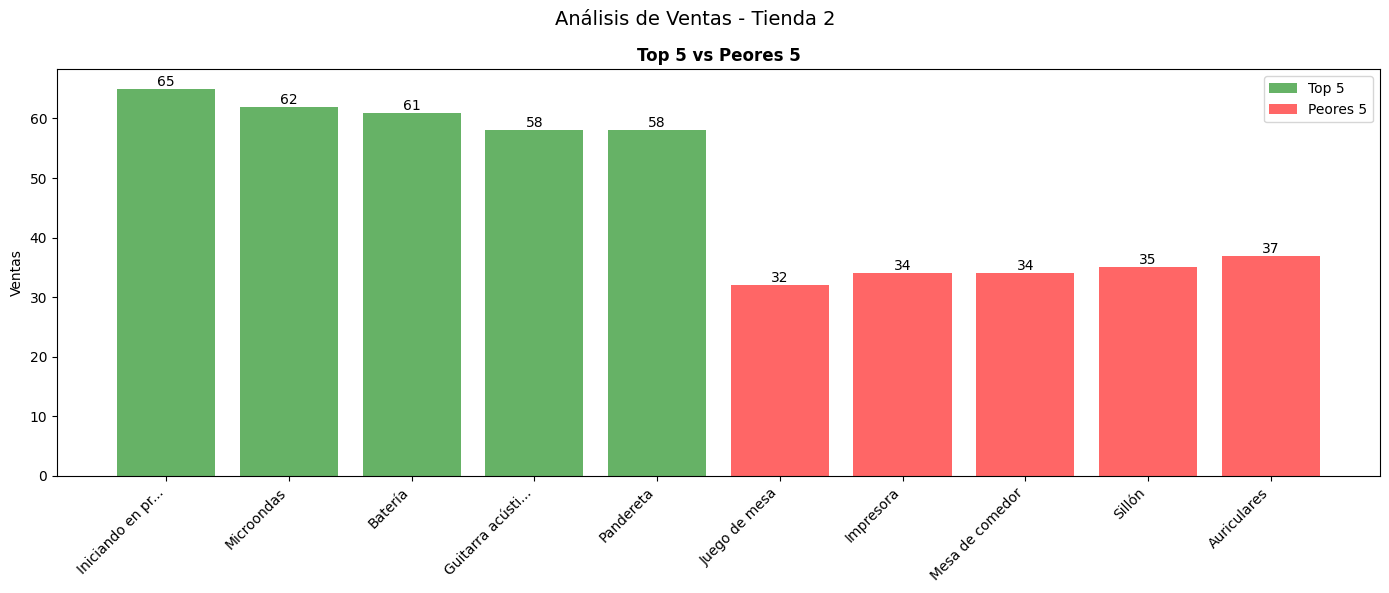


ANÁLISIS DE PRODUCTOS - Tienda 3
Total ventas: 2359
Productos únicos: 51

 PRODUCTO MÁS VENDIDO:
   Kit de bancas - 57 ventas

 PRODUCTO MENOS VENDIDO:
   Bloques de construcción - 35 ventas

 TOP 5 PRODUCTOS:
   1. Kit de bancas - 57 ventas
   2. Mesa de comedor - 56 ventas
   3. Cama king - 56 ventas
   4. Set de ollas - 55 ventas
   5. Mesa de noche - 55 ventas


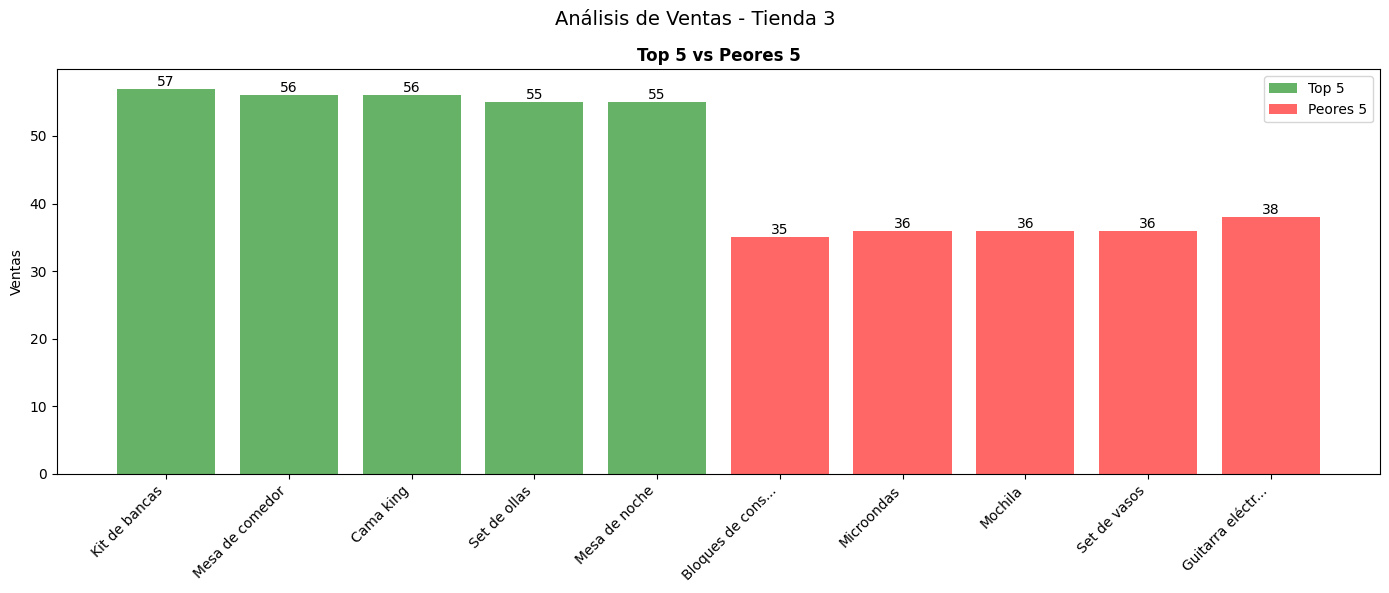


ANÁLISIS DE PRODUCTOS - Tienda 4
Total ventas: 2358
Productos únicos: 51

 PRODUCTO MÁS VENDIDO:
   Cama box - 62 ventas

 PRODUCTO MENOS VENDIDO:
   Guitarra eléctrica - 33 ventas

 TOP 5 PRODUCTOS:
   1. Cama box - 62 ventas
   2. Cubertería - 59 ventas
   3. Dashboards con Power BI - 56 ventas
   4. Cama king - 56 ventas
   5. Carrito de control remoto - 55 ventas


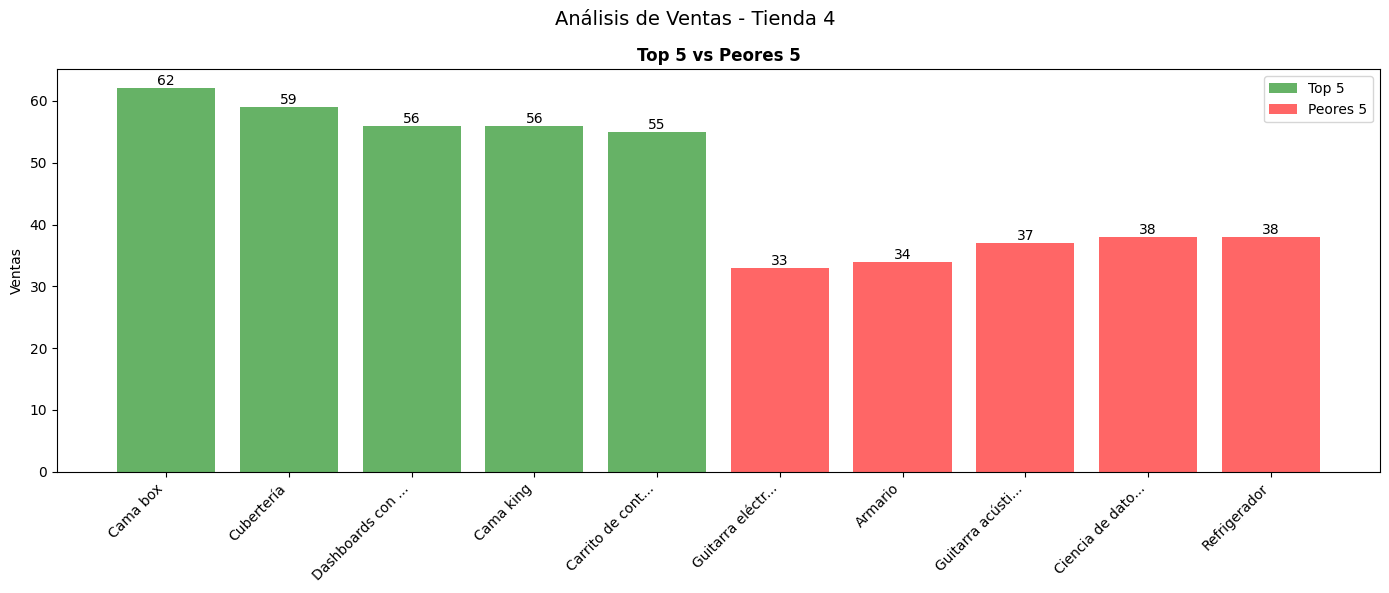


 COMPARATIVO ENTRE TIENDAS


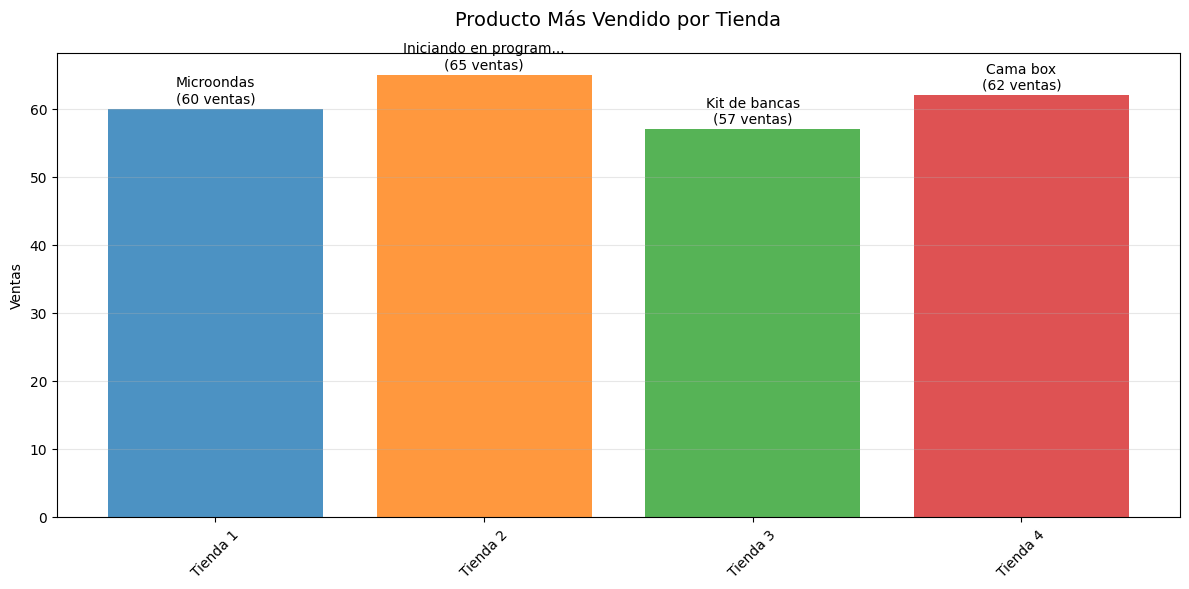

In [24]:
import matplotlib.pyplot as plt

def analizar_productos_vendidos(tienda, nombre_tienda):
    # Contar ventas por producto (cada fila = una venta)
    productos = tienda['Producto'].value_counts().reset_index()
    productos.columns = ['Producto', 'Ventas']

    # Ordenar por ventas (mayor a menor)
    productos_ordenados = productos.sort_values('Ventas', ascending=False)

    # Top 5 (más vendidos)
    top_5 = productos_ordenados.head(5).values.tolist()

    # Peores 5 (menos vendidos)
    peores_5 = productos_ordenados.tail(5).values.tolist()
    peores_5.reverse()

    total_ventas = productos['Ventas'].sum()  # Total de transacciones
    productos_unicos = len(productos)

    resultados = {
        'tienda': nombre_tienda,
        'total_ventas': total_ventas,
        'productos_unicos': productos_unicos,
        'producto_mas_vendido': top_5[0],
        'producto_menos_vendido': peores_5[0],
        'top_5': top_5,
        'peores_5': peores_5
    }

    return resultados

def mostrar_resultados(resultados):
    print(f"\n{'='*50}")
    print(f"ANÁLISIS DE PRODUCTOS - {resultados['tienda']}")
    print(f"{'='*50}")
    print(f"Total ventas: {resultados['total_ventas']}")
    print(f"Productos únicos: {resultados['productos_unicos']}")

    print(f"\n PRODUCTO MÁS VENDIDO:")
    print(f"   {resultados['producto_mas_vendido'][0]} - {resultados['producto_mas_vendido'][1]} ventas")

    print(f"\n PRODUCTO MENOS VENDIDO:")
    print(f"   {resultados['producto_menos_vendido'][0]} - {resultados['producto_menos_vendido'][1]} ventas")

    print(f"\n TOP 5 PRODUCTOS:")
    for i, (producto, cantidad) in enumerate(resultados['top_5'], 1):
        print(f"   {i}. {producto} - {cantidad} ventas")

def graficar_resultados(resultados):
    plt.figure(figsize=(14, 6))

    # Datos
    top_5 = resultados['top_5']
    peores_5 = resultados['peores_5']

    nombres_top = [f"{p[0][:15]}..." if len(p[0]) > 15 else p[0] for p in top_5]
    valores_top = [p[1] for p in top_5]

    nombres_peores = [f"{p[0][:15]}..." if len(p[0]) > 15 else p[0] for p in peores_5]
    valores_peores = [p[1] for p in peores_5]

    # Gráfico 1: Comparación Top vs Peores
    bars_top = plt.bar(nombres_top, valores_top, color='green', alpha=0.6, label='Top 5')
    bars_peores = plt.bar(nombres_peores, valores_peores, color='red', alpha=0.6, label='Peores 5')

    plt.title('Top 5 vs Peores 5', fontweight='bold')
    plt.ylabel('Ventas')
    plt.xticks(rotation=45, ha='right')
    plt.legend()

    # Añadir valores encima de las barras
    for bar in bars_top:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height,
                f'{height}', ha='center', va='bottom')

    for bar in bars_peores:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height,
                f'{height}', ha='center', va='bottom')

    plt.suptitle(f"Análisis de Ventas - {resultados['tienda']}", fontsize=14)
    plt.tight_layout()
    plt.show()

def analisis_comparativo(todos_resultados):
    plt.figure(figsize=(12, 6))

    # Datos para comparación
    tiendas = [r['tienda'] for r in todos_resultados]
    top_ventas = [r['producto_mas_vendido'][1] for r in todos_resultados]
    top_productos = [r['producto_mas_vendido'][0][:20] + '...'
                    if len(r['producto_mas_vendido'][0]) > 20
                    else r['producto_mas_vendido'][0]
                    for r in todos_resultados]

    colors = plt.cm.tab10.colors

    # Gráfico de barras
    bars = plt.bar(tiendas, top_ventas, color=colors[:len(tiendas)], alpha=0.8)

    # Añadir etiquetas
    for bar, producto, ventas in zip(bars, top_productos, top_ventas):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                f"{producto}\n({ventas} ventas)",
                ha='center', va='bottom', fontsize=10)

    plt.title('Producto Más Vendido por Tienda', fontsize=14, pad=20)
    plt.ylabel('Ventas')
    plt.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

todos_resultados = []
for nombre, df_tienda in tiendas.items():
    resultados = analizar_productos_vendidos(df_tienda, nombre)
    todos_resultados.append(resultados)

    mostrar_resultados(resultados)
    graficar_resultados(resultados)

# Análisis comparativo final
if todos_resultados:
    print("\n" + "="*60)
    print(" COMPARATIVO ENTRE TIENDAS")
    print("="*60)
    analisis_comparativo(todos_resultados)

# 5. Envío promedio por tienda

Calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda


COSTO PROMEDIO DE ENVÍO POR TIENDA

Tienda 1:
  → Costo promedio de envío: $26018.61 pesos
  → Total de envíos calculados: 2359

Tienda 2:
  → Costo promedio de envío: $25216.24 pesos
  → Total de envíos calculados: 2359

Tienda 3:
  → Costo promedio de envío: $24805.68 pesos
  → Total de envíos calculados: 2359

Tienda 4:
  → Costo promedio de envío: $23459.46 pesos
  → Total de envíos calculados: 2358


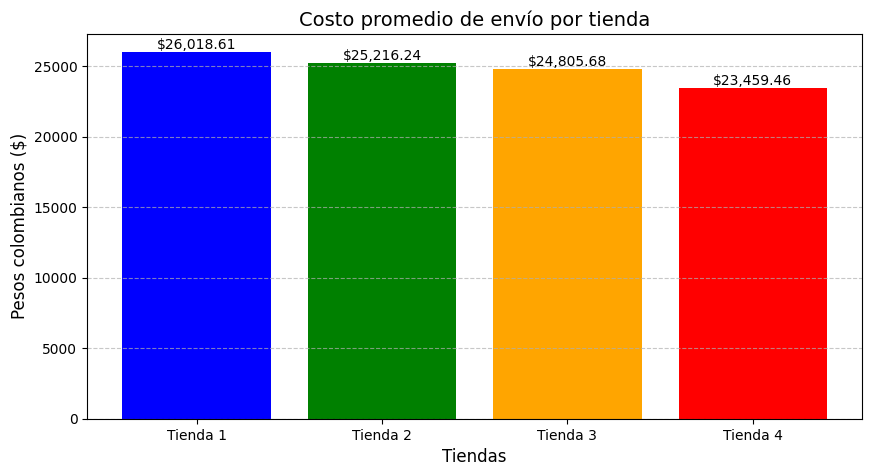

In [23]:
import matplotlib.pyplot as plt

def calcular_costo_envio_promedio(tienda, nombre_tienda):
    # Calcular el promedio usando la columna 'Costo de envío'
    promedio = tienda['Costo de envío'].mean()
    return promedio

def mostrar_promedio_envios(tiendas_dict):
# Muestra los promedios de costo de envío para todas las tiendas.
    print("\n" + "="*50)
    print("COSTO PROMEDIO DE ENVÍO POR TIENDA")
    print("="*50)

    # Diccionario para almacenar resultados
    resultados = {}

    for nombre, df in tiendas_dict.items():
        # Calcular promedio
        promedio = round(calcular_costo_envio_promedio(df, nombre),2)
        resultados[nombre] = promedio

        # Mostrar resultado
        print(f"\n{nombre}:")
        print(f"  → Costo promedio de envío: ${promedio} pesos")
        # mostrar total de envios eliminando filas o columnas que contienen valores nulos
        print(f"  → Total de envíos calculados: {len(df['Costo de envío'].dropna())}")

    return resultados

def graficar_costos_envio(resultados):
    # Preparar datos
    tiendas = list(resultados.keys())
    promedios = list(resultados.values())

    # Crear gráfico
    plt.figure(figsize=(10, 5))
    bars = plt.bar(tiendas, promedios, color=['blue', 'green', 'orange', 'red'])

    # Añadir título y etiquetas
    plt.title('Costo promedio de envío por tienda', fontsize=14)
    plt.xlabel('Tiendas', fontsize=12)
    plt.ylabel('Pesos colombianos ($)', fontsize=12)

    # Mostrar valores en las barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.2f}',
                ha='center', va='bottom')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

# Calcular y mostrar resultados
resultados_envios = mostrar_promedio_envios(tiendas)
graficar_costos_envio(resultados_envios)

# INFORME FINAL: COMPARACIÓN ENTRE TIENDAS
Recomendación para el Señor Juan

## 1. Introducción
El presente informe tiene como propósito determinar cuál de las cuatro tiendas analizadas representa la mejor opción para que el Sr. Juan comercialice sus productos. Para tomar una decisión fundamentada, se consideraron distintos factores clave: ingresos totales, cantidad de ventas por categoría, satisfacción de los clientes, productos más y menos vendidos, y el coste promedio de envío. A través del análisis detallado de estos indicadores, se busca identificar la tienda con mejor desempeño integral, equilibrando rentabilidad, eficiencia logística y percepción del cliente.

## 2. Análisis de los resultados

### 2.1. Ingresos totales por tienda

El análisis financiero revela diferencias significativas en la generación de ingresos (en pesos colombianos) entre las cuatro tiendas:

* Tienda 1: 1,150,880,400 (26.1% del total)
* Tienda 2: 1,116,343,500 (25.4% del total)
* Tienda 3: 1,098,019,600 (24.9% del total)
* Tienda 4: 1,038,375,700 (23.6% del total)

La Tienda 1 lidera con una ventaja de 34.5 millones sobre la segunda mejor, mientras que la Tienda 4 registra 112.5 millones menos que la líder, representando una brecha del 10.8% en ingresos.

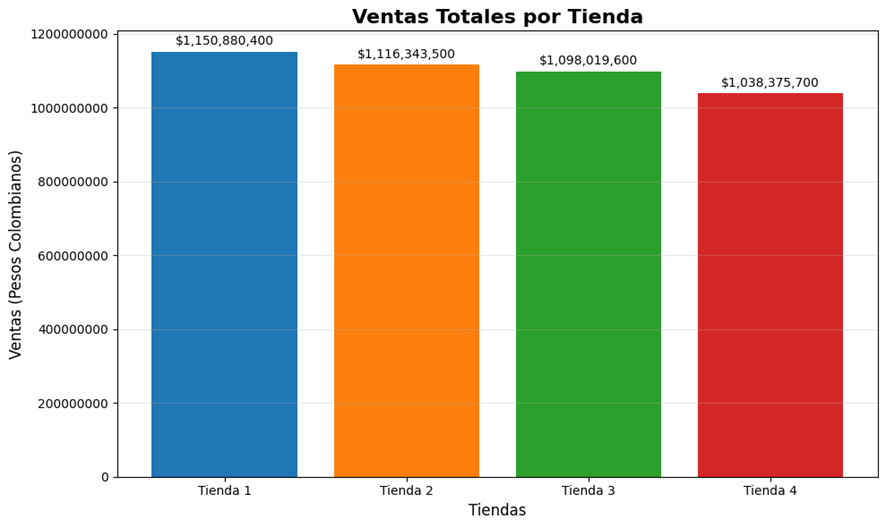

### 2.2. Categorías de productos más y menos vendidas

El análisis de categorías muestra patrones consistentes across todas las tiendas:

Categorías Dominantes:

* Muebles: 18.7% - 21.2% de las ventas
* Electrónicos: 17.9% - 19.1% de las ventas
* Juguetes: 13.3% - 14.3% de las ventas

Observaciones Clave:

* La Tienda 3 destaca en muebles (21.2%), su categoría más fuerte
* La Tienda 1 mantiene el mejor equilibrio entre muebles y electrónicos
* Todas las tiendas muestran un patrón similar de preferencias del consumidor

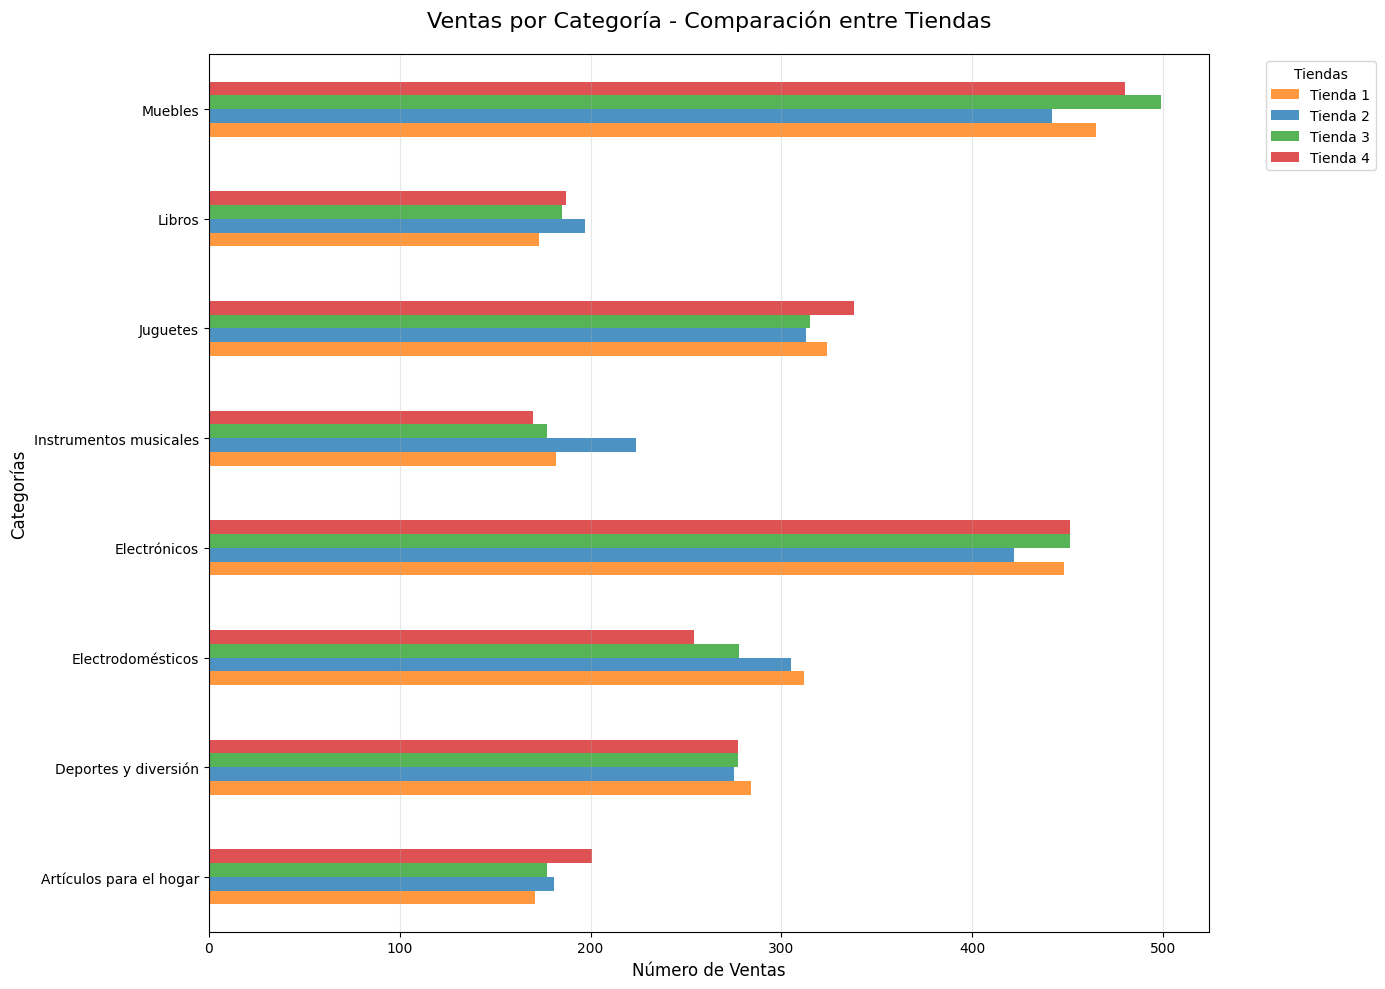



### 2.3. Calificaciones promedio de los clientes por tienda


Las calificaciones promedio revelan una relación inversa entre ingresos y satisfacción:

* Tienda 3: 4.05/5 (máxima satisfacción)
* Tienda 2: 4.04/5
* Tienda 4: 4.00/5
* Tienda 1: 3.98/5 (menor satisfacción)

Esta tendencia sugiere que las tiendas con mayores ingresos pueden estar priorizando volumen sobre experiencia del cliente.

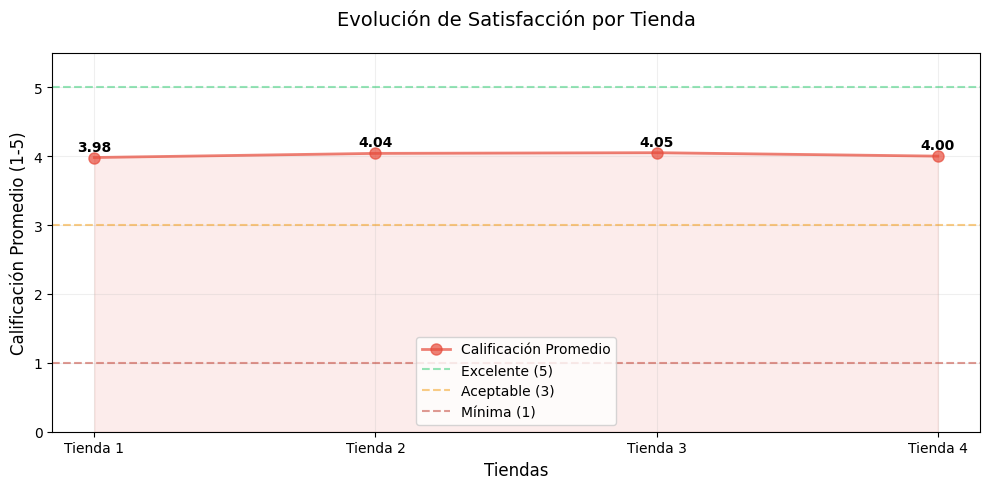

### 2.4. Productos Más y Menos Venidos

Productos Estrella por Tienda:

* Tienda 1: Microondas (60 ventas)
* Tienda 2: Iniciando en programación (65 ventas)
* Tienda 3: Kit de bancas (57 ventas)
* Tienda 4: Cama box (62 ventas)

Productos con Menor Rendimiento:

* Tienda 1: Celular ABXY (33 ventas)
* Tienda 2: Juego de mesa (32 ventas)
* Tienda 3: Bloques de construcción (35 ventas)
* Tienda 4: Guitarra eléctrica (33 ventas)

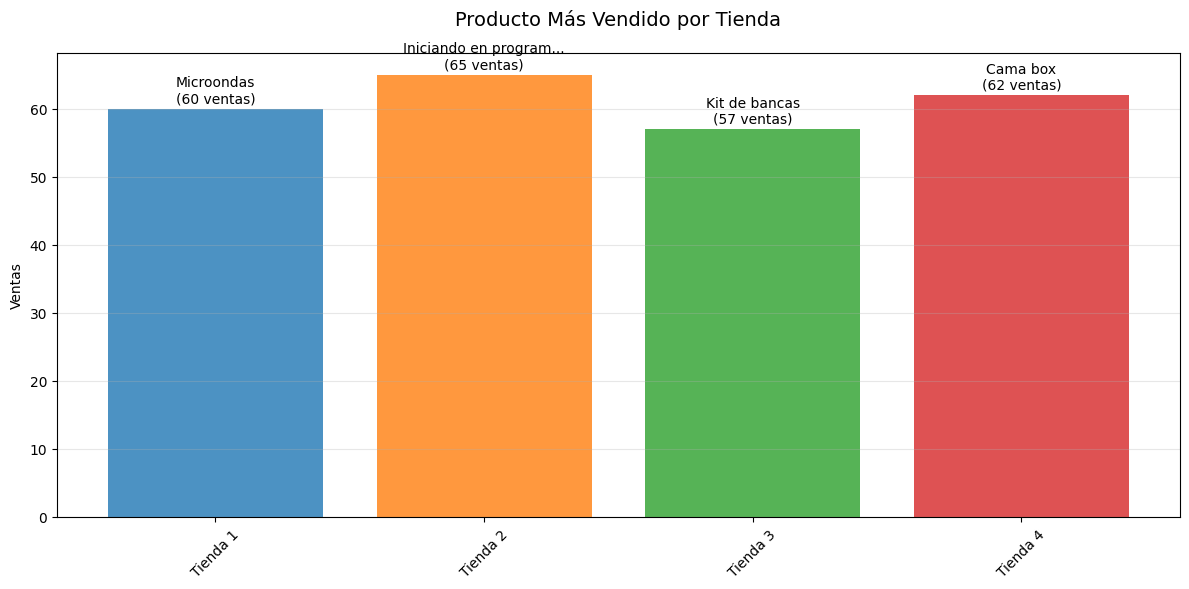

### 2.5. Costos de Envío Promedio

Los costos operativos de envío muestran una correlación directa con los ingresos(en pesos colombianos):

* Tienda 1: 26,018.61 (costo más alto)
* Tienda 2: 25,216.24
* Tienda 3: 24,805.68
* Tienda 4: 23,459.46 (costo más bajo)

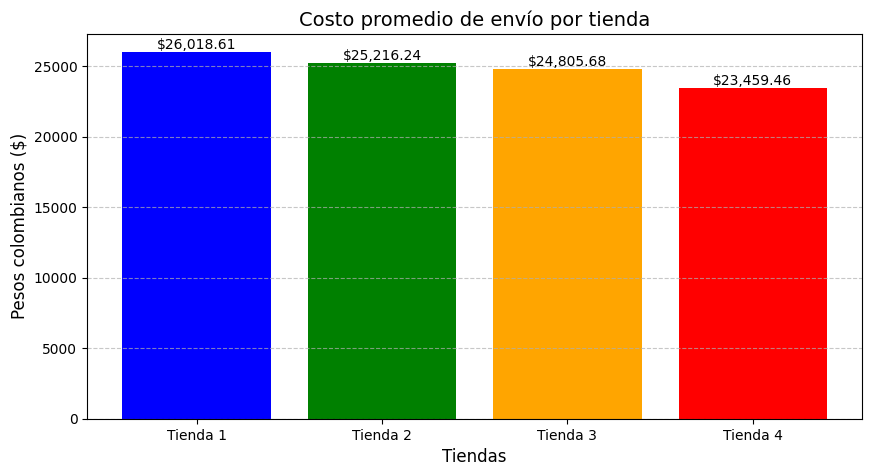

## 3. Evaluación de situacion por cada tienda

### Tienda 1 - Líder en Ingresos
Fortalezas:

* Máxima generación de ingresos ($1,150.9 millones)
* Fuerte desempeño en categorías principales
* Productos estrella con alta demanda

Debilidades:

* Menor satisfacción del cliente (3.98/5)
* Costos de envío más elevados
* Potencial riesgo de pérdida de clientes por servicio

### Tienda 2 - Equilibrio Estratégico
Fortalezas:

* Segundo lugar en ingresos ($1,116.3 millones)
* Buena satisfacción del cliente (4.04/5)
* Costos de envío competitivos

Debilidades:

* Menor diferenciación en el mercado
* Dependencia de productos específicos

### Tienda 3 - Excelencia en Servicio
Fortalezas:

* Máxima satisfacción del cliente (4.05/5)
* Liderazgo en categoría muebles
* Costos de envío competitivos
* Potencial de crecimiento basado en reputación

Debilidades:

* Tercer lugar en ingresos
* Oportunidad de optimización no aprovechada

### Tienda 4 - Menor Rendimiento
Fortalezas:

* Menores costos operativos de envío
* Satisfacción del cliente aceptable

Debilidades:

* Ingresos significativamente menores ($1,038.4 millones)
* Posición competitiva débil

## 4. Conclusión y Recomendación

De acuerdo al estudio de la situación y los resultados del análisis, se le recomienda al Señor Juan vender la Tienda 4 por las siguientes razones:

1. La Tienda 4 gana $112.5 millones menos que la tienda que más vende, lo que representa una diferencia del 10.8%. Además, solo aporta el 23.6% de todos los ingresos del negocio. Esto significa que su aporte al dinero que entra en la empresa es bajo en comparación con las otras tiendas, por lo que no es tan rentable.

2. Aunque la Tienda 4 tiene los costos de envío más bajos, esto no se ha traducido en un aumento en sus ventas. En general, su posición frente a la competencia es débil.

3. Las otras tres tiendas juntas generan el 76.4% de todos los ingresos, y cada una tiene una fortaleza clara: la Tienda 1 gana más dinero, la Tienda 2 tiene un buen equilibrio general y la Tienda 3 ofrece el mejor servicio al cliente. En cambio, la Tienda 4 no tiene una ventaja destacada. Por eso, concentrar esfuerzos y recursos en las tres tiendas más fuertes permitirá que el negocio funcione de manera más eficiente y tenga mejores resultados.

Oportunidades de Optimización:
Manteniendo las Tiendas 1, 2 y 3, el Señor Juan podrá:

* Aplicar las mejores prácticas de satisfacción de la Tienda 3 a las otras dos
* Optimizar los costos de envío de la Tienda 1
* Potenciar el equilibrio estratégico de la Tienda 2
* Reinvertir los recursos de la Tienda 4 en las operaciones más exitosas